In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("placement.csv")
data.head(10)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [3]:
data.isnull().sum()

cgpa       0
package    0
dtype: int64

In [4]:
data.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


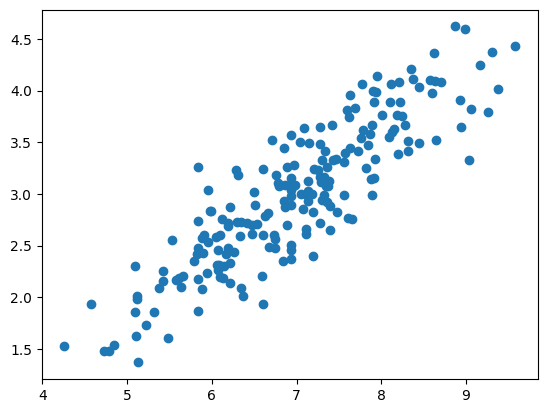

In [7]:
plt.scatter(data.cgpa,data.package)

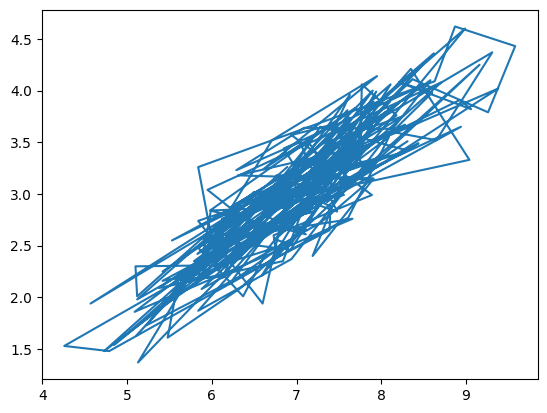

In [8]:
plt.plot(data.cgpa,data.package)

In [9]:
data.shape

(200, 2)

In [10]:
def loss_function(m,b,data):
        total_error=0 
        for i in range(0,len(data)):
              x=data.iloc[i]['cgpa']
              y=data.iloc[i]['package']
              total_error=(y-(m*x+b))**2
              total_error/=float(len(data))
        print(total_error)  
         

                   
loss_function(1,2,data)

0.17346049999999993


In [11]:
def gradient_descent(m_now,b_now,data,learning):
    m_gradient=0
    b_gradient=0
    n=len(data)
    for i in range(0,n):
        x=data.iloc[i]['cgpa']
        y=data.iloc[i]['package']
        m_gradient+=(-2/n) * x*(y-(m_now*x+b_now))
        b_gradient+=(-2/n) * (y-(m_now*x+b_now))
    m=m_now-m_gradient*learning
    b=b_now-b_gradient*learning
    return m,b  
m=1
b=0
learning=0.0001
epochs=5000

for i in range(epochs):
    m,b=gradient_descent(m,b,data,learning)
    #print(f"In {i} epoch m : {m} and b : {b}")
print(m,b)
     


0.44544030847199967 -0.0979875190977068


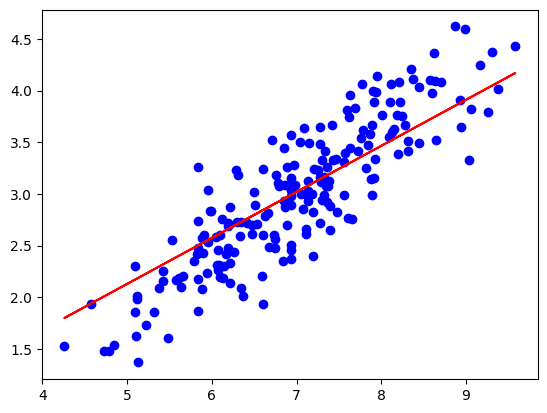

In [12]:
plt.scatter(data['cgpa'], data['package'], color='blue', label='Original Data')
x_values=data['cgpa']
y_values=m*x_values+b
plt.plot(x_values, y_values, color='red', label='Regression Line')